## 模型测试脚本

### 1. 将存储在OBS上的模型拷贝到Notebook
使用ModelArts自研moxing模块的file_copy(src_path, dst_path)来实现，src_path是OBS上的存储路径，dst_path是本地路径，如果不存在会被自动创建

In [1]:
import moxing as mox
mox.file.copy_parallel('obs://myobsbucket0408/train_output/V0006/model/', '../train_output/V0006/model/')

INFO:root:Using MoXing-v1.14.1-90becc8d
INFO:root:Using OBS-Python-SDK-3.1.2


### 2. YOLO模型初始化

In [2]:
import os
import cv2
import time
import json
import codecs
import numpy as np
import PIL.Image as pil_Image
from yolo import YOLO, detect_video

Using TensorFlow backend.


In [3]:
# args参数中分别是模型、anchors参数和classes参数所在路径
args = {"model_path": '../train_output/V0006/model/trained_weights_final.h5',
        "anchors_path": '../train_output/V0006/model/train_anchors.txt',
        "classes_path": '../train_output/V0006/model/train_classes.txt'}
yolo_predictor = YOLO(**args)

Instructions for updating:
Colocations handled automatically by placer.


../train_output/V0006/model/trained_weights_final.h5 model, anchors, and classes loaded.


### 3. 测试单张图片

Found 1 boxes for img
label_id: 15, label_name: 易拉罐, score: 0.31,  box: (67, 31) (339, 356)


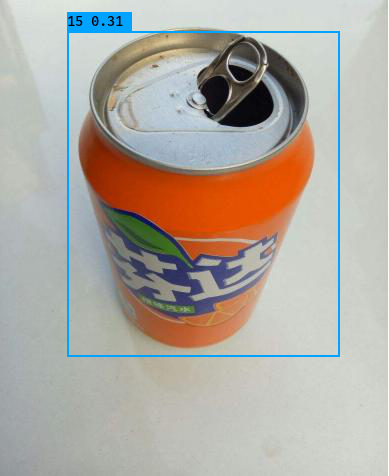

In [4]:
img_path = '../datasets/test/JPEGImages/img_11278.jpg'
image = pil_Image.open(img_path)
r_image, result = yolo_predictor.detect_image(image)
r_image

### 4. 批量测试图片
请手动上传图片到Notebook，并在下面的代码中修改待测试图片所在的路径

In [5]:
img_dir = '../datasets/test/JPEGImages'  # 待测试图片所在的路径
output_dir = img_dir + '_output'  # 模型测试结果保存路径
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
files = os.listdir(img_dir)
for i, file_name in enumerate(files):
    if i % 10 == 0:
        print('predicting', i)
    if not file_name.endswith('jpg'):
        continue
    image = pil_Image.open(os.path.join(img_dir, file_name))
    r_image, result = yolo_predictor.detect_image(image)
    r_image.save(os.path.join(output_dir, file_name))  # 保存绘制了方框的图
    with codecs.open(os.path.join(output_dir, file_name.split('.')[0] + '.json'), 'w', 'utf-8') as f:
        json.dump(result, f, indent=4, sort_keys=False, ensure_ascii=False)  # 保存预测结果
print('end')

predicting 0
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 0 boxes for img
Found 1 boxes for img
label_id: 15, label_name: 易拉罐, score: 0.31,  box: (67, 31) (339, 356)
Found 1 boxes for img
label_id: 2, label_name: 充电宝, score: 0.40,  box: (209, 69) (571, 465)
predicting 10
Found 0 boxes for img
end


### 5. 计算mAP

In [6]:
from cal_mAP import *

res_dir = output_dir  # 模型预测结果
gt_dir = '../datasets/test/Annotations'  # groud_truth
class_path = '../train_output/V0006/model/train_classes.txt'  # 数据集所有类别名的文件
imagesetfile = '../datasets/test/ImageSets/Main/test.txt'  # 读取图像名字列表文件
cal_mAP(res_dir, gt_dir, class_path, imagesetfile)

process_results end
   classname      AP  recall precision
0     一次性快餐盒  0.0000  0.0000    0.0000
1       书籍纸张  0.0000  0.0000    0.0000
2        充电宝  0.0000  0.0000    0.0000
3       剩饭剩菜  0.0000  0.0000    0.0000
4          包  0.0000  0.0000    0.0000
5        垃圾桶  0.0000  0.0000    0.0000
6       塑料厨具  0.0000  0.0000    0.0000
7       塑料器皿  0.0000  0.0000    0.0000
8       塑料玩具  0.0000  0.0000    0.0000
9       塑料衣架  0.0000  0.0000    0.0000
10       大骨头  0.0000  0.0000    0.0000
11       干电池  0.0000  0.0000    0.0000
12      快递纸袋  0.0000  0.0000    0.0000
13      插头电线  0.0000  0.0000    0.0000
14       旧衣服  0.0000  0.0000    0.0000
15       易拉罐  0.0000  0.0000    0.0000
16        枕头  0.0000  0.0000    0.0000
17      果皮果肉  0.0000  0.0000    0.0000
18        毛巾  0.0000  0.0000    0.0000
19      毛绒玩具  0.0000  0.0000    0.0000
20      污损塑料  0.0000  0.0000    0.0000
21      污损用纸  0.0000  0.0000    0.0000
22      洗护用品  0.0000  0.0000    0.0000
23        烟蒂  0.0000  0.0000    0.0000
24   